# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Load the Data

In [2]:
shipping_data = pd.read_csv("C:/Users/keshi/Downloads/archive (1)/Output_file/Shipping_cleaned_data.csv")

In [3]:
shipping_data.head()

,Unnamed: 0,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
shipping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           10999 non-null  int64 
 1   ID                   10999 non-null  int64 
 2   Warehouse_block      10999 non-null  object
 3   Mode_of_Shipment     10999 non-null  object
 4   Customer_care_calls  10999 non-null  int64 
 5   Customer_rating      10999 non-null  int64 
 6   Cost_of_the_Product  10999 non-null  int64 
 7   Prior_purchases      10999 non-null  int64 
 8   Product_importance   10999 non-null  object
 9   Gender               10999 non-null  object
 10  Discount_offered     10999 non-null  int64 
 11  Weight_in_gms        10999 non-null  int64 
 12  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [5]:
shipping_data.drop(shipping_data.columns[shipping_data.columns.str.contains('unnamed',case = False)],axis = 1,
                   inplace = True)

In [6]:
shipping_data.head(2)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1


In [7]:
shipping_data.set_index('ID', inplace=True)

In [8]:
shipping_data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


# Explore Data

Plotting numerical data to analyze frequency

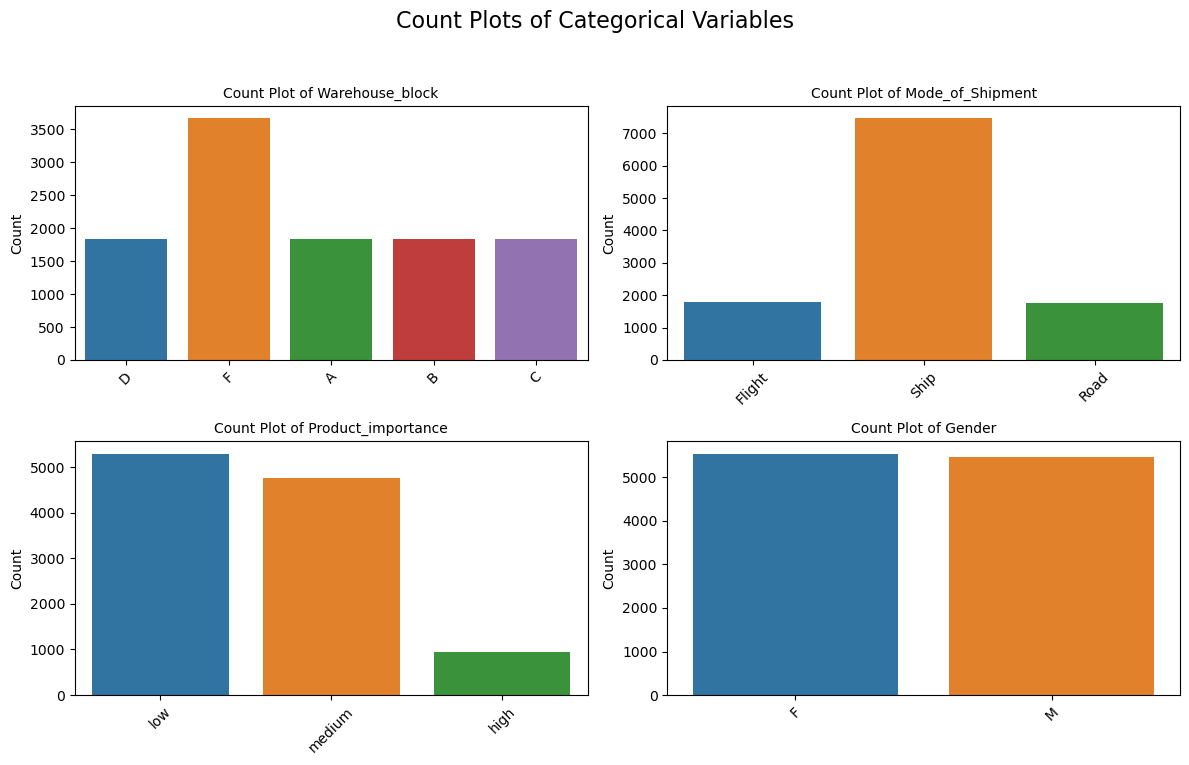

In [9]:
numerical_data = shipping_data.select_dtypes(include=['int64', 'float64'])
categorical_data = shipping_data.select_dtypes(include=['object'])

fig, axes = plt.subplots(nrows=int(np.ceil(len(categorical_data.columns) / 2)), ncols=2, figsize=(12, 8))
fig.suptitle('Count Plots of Categorical Variables', fontsize=16)
for ax, col in zip(axes.flatten(), categorical_data.columns):
    sns.countplot(x=categorical_data[col], ax=ax)
    ax.set_title(f'Count Plot of {col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


analysing the impact of delievery based on product importance

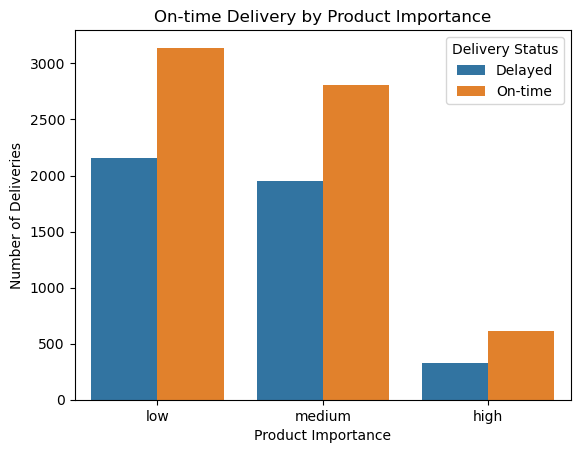

In [10]:
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=shipping_data)
plt.title('On-time Delivery by Product Importance')
plt.xlabel('Product Importance')
plt.ylabel('Number of Deliveries')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()

Analyzing the proportion of on-time and delayed deliveries

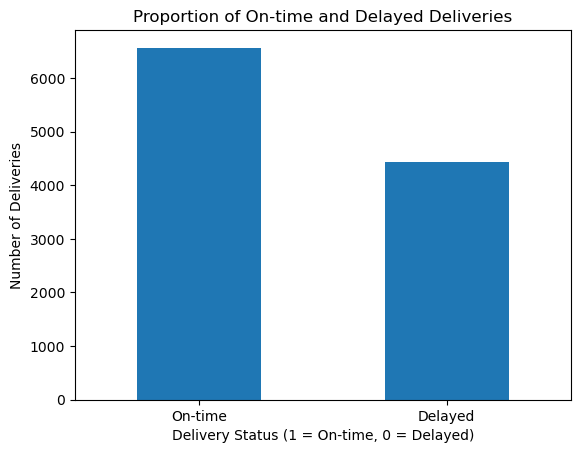

In [11]:
on_time_deliveries = shipping_data['Reached.on.Time_Y.N'].value_counts()
on_time_deliveries.plot(kind='bar')
plt.title('Proportion of On-time and Delayed Deliveries')
plt.xlabel('Delivery Status (1 = On-time, 0 = Delayed)')
plt.ylabel('Number of Deliveries')
plt.xticks(ticks=[0, 1], labels=['On-time', 'Delayed'], rotation=0)
plt.show()


More than 6000 products were delieved on time via ship method 

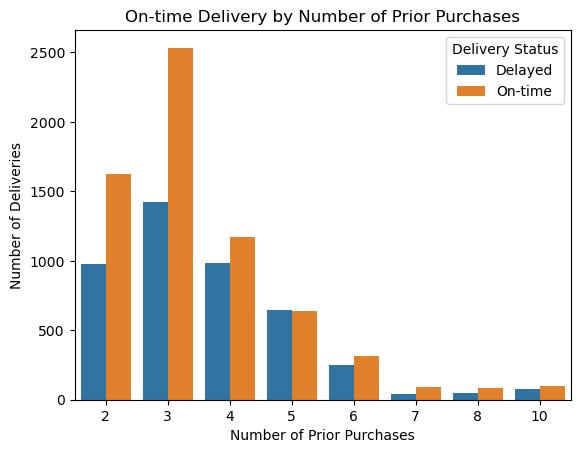

In [12]:
sns.countplot(x='Prior_purchases', hue='Reached.on.Time_Y.N', data = shipping_data)
plt.title('On-time Delivery by Number of Prior Purchases')
plt.xlabel('Number of Prior Purchases')
plt.ylabel('Number of Deliveries')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()

Analyzing how discount offered might influence delivery success

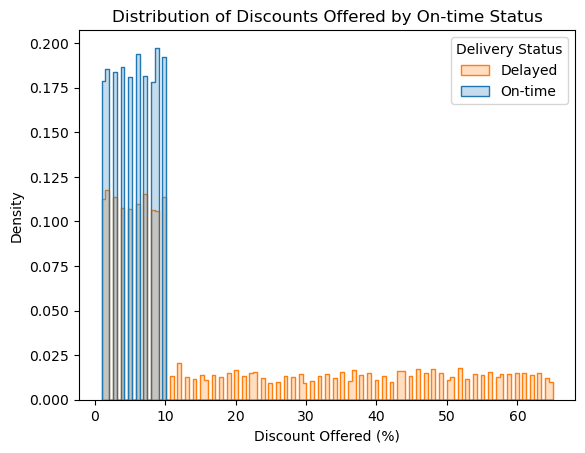

In [13]:
sns.histplot(data=shipping_data, x='Discount_offered', hue='Reached.on.Time_Y.N', element='step', stat='density', common_norm=False)
plt.title('Distribution of Discounts Offered by On-time Status')
plt.xlabel('Discount Offered (%)')
plt.ylabel('Density')
plt.legend(title='Delivery Status', labels=['Delayed', 'On-time'])
plt.show()

The products with the highest discounts were delivered on time. One possible reason is that offering discounts can encourage users to opt for premium delivery methods.

# Calculate the PCA transformation

Fit the PCA transformation using the scaled data.

In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Load your data (assuming your DataFrame is named 'shipping_data')
# For example:
# shipping_data = pd.read_csv('your_data.csv')

# Separate numerical and categorical columns
numerical_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 
                  'Discount_offered', 'Weight_in_gms']
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

# Preprocess numerical data: scale the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(shipping_data[numerical_cols])

# Preprocess categorical data: one-hot encode the categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(shipping_data[categorical_cols])

# Get the feature names after one-hot encoding
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# Combine the scaled numerical data and encoded categorical data
processed_data = pd.concat([pd.DataFrame(scaled_data, columns=numerical_cols),
                            pd.DataFrame(encoded_data, columns=encoded_cols)],
                            axis=1)

# Apply PCA
pca = PCA()
pca.fit(processed_data)

# Transform the data using PCA
pca_transformed_data = pca.transform(processed_data)

# Convert PCA transformed data to DataFrame
pca_transformed_df = pd.DataFrame(pca_transformed_data, columns=[f'PC{i}' for i in range(1, pca.n_components_+1)])

# Print the transformed DataFrame
print(pca_transformed_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.206684  2.507430 -0.669615 -0.177148 -0.305287 -0.396836  0.457625   
1 -0.144233  2.398822  1.420008 -1.263399  0.449869  0.486761  1.351850   
2 -1.143287  2.154967 -0.587456  0.717177  1.221115 -0.240507  0.872973   
3 -0.077532  0.956229  0.058541  0.766674 -0.024809 -0.597078 -1.572521   
4 -1.181420  2.407289 -0.603505  0.221608  1.085309  0.400835 -0.550530   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.479506 -0.438891 -0.503192  0.749505 -0.302033  0.519506 -0.070342   
1  0.472174  0.654314  0.530685  0.015707  0.010401  0.513273 -0.087287   
2  0.497514 -0.181391  0.516383  0.007323 -0.007946  0.519417 -0.088449   
3  0.492928 -0.379781  0.524412 -0.099409  0.781430  0.508509 -0.048606   
4  0.512231 -0.387340 -0.481634 -0.650400 -0.503169  0.525793 -0.095699   

       PC15  
0 -0.109693  
1 -0.038327  
2  0.408087  
3 -0.106680  
4 -0.101233  


C:\Users\keshi\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [76]:
print(pca.explained_variance_ratio_)

[0.20933216 0.17499352 0.12921616 0.11607392 0.08786371 0.06194388
 0.05523033 0.03780578 0.03501423 0.03228375 0.0215408  0.02152546
 0.00773926 0.00503273 0.00440431]


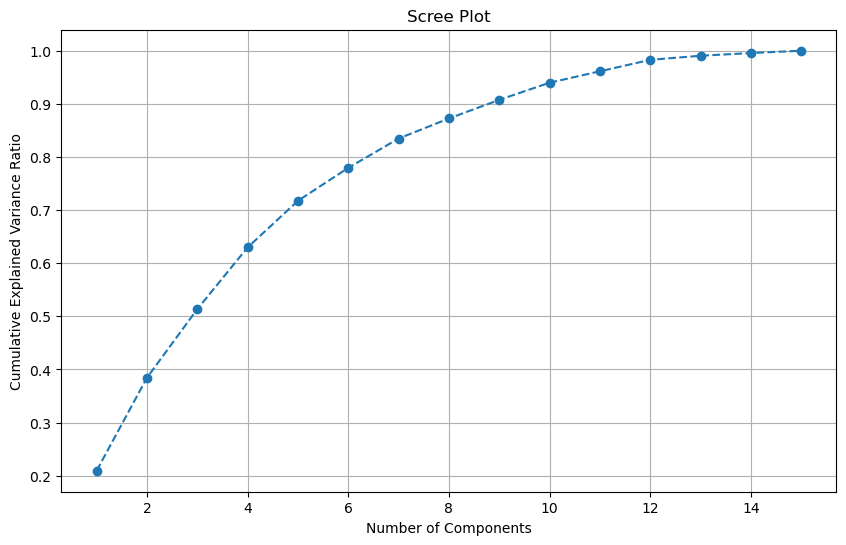

In [78]:

explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Plot the Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

9 components has the variance ratio of 90%. 

# Chi Square Test - Feature Selection

is there a relationship between customer rating and product reached on time?

In [67]:
from scipy.stats import chi2_contingency
# Create a contingency table between Delivery Status and Customer Rating
contingency_table = pd.crosstab(shipping_data['Customer_rating'], shipping_data['Reached.on.Time_Y.N'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("\nChi-square Test Results:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Contingency Table:
Reached.on.Time_Y.N    0     1
Customer_rating               
1                    922  1313
2                    892  1273
3                    882  1357
4                    886  1303
5                    854  1317

Chi-square Test Results:
Chi-square statistic: 3.200045474831146
P-value: 0.5249236018493662
Degrees of freedom: 4
Expected frequencies:
[[ 901.39649059 1333.60350941]
 [ 873.16483317 1291.83516683]
 [ 903.00972816 1335.99027184]
 [ 882.84425857 1306.15574143]
 [ 875.58468952 1295.41531048]]


There does not appear to be a statistically significant relationship between a customer's rating and whether their delivery reached on time or not.

This result suggests that delivery status does not significantly differ across different levels of customer rating.

# Feature correlation heatmap

A great way to gain a high level view of relationships amongst the features.

<Axes: >

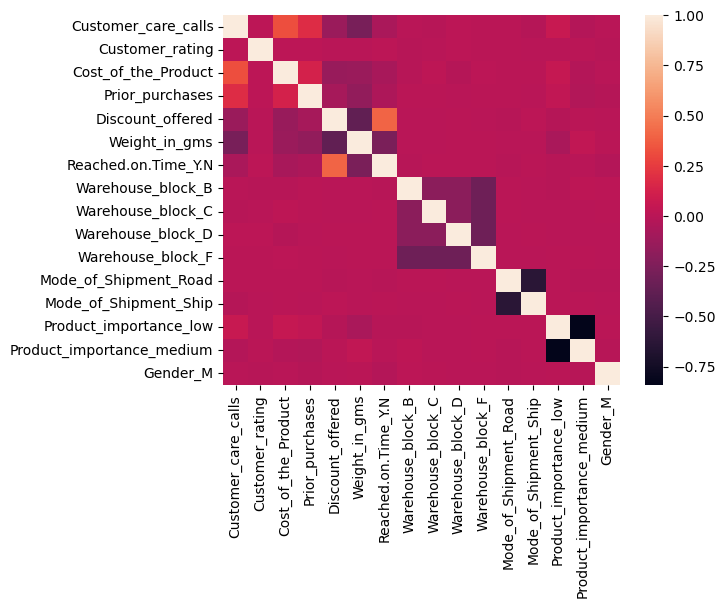

In [28]:
plt.subplots()
sns.heatmap(df1.corr(numeric_only=True))

discount_offered and reached.on.Time_Y.n are quite highly correlated. This isn't a surprise.

We can conclude that there is a postive relationship between the discount_offered and reached on time products.

# Formulate Hypotheses:

In [50]:
# Assuming your DataFrame is named 'shipping_data'
on_time = shipping_data[shipping_data['Reached.on.Time_Y.N'] == 0]['Cost_of_the_Product']
not_on_time = shipping_data[shipping_data['Reached.on.Time_Y.N'] == 1]['Cost_of_the_Product']

In [52]:
import scipy.stats as stats

# Perform the t-test
t_stat, p_value = stats.ttest_ind(on_time, not_on_time, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the cost of the product based on delivery times.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the cost of the product on delivery times.")

T-statistic: 7.737818128158982, P-value: 1.099885972621861e-14
Reject the null hypothesis: There is a significant difference in the cost of the product based on delivery times.


# Calculating Pearson correlation coefficients 

In [81]:
from scipy.stats import pointbiserialr
# Convert 'Warehouse_block' to dummy variables
dummy_warehouse = pd.get_dummies(shipping_data['Warehouse_block'])

# Calculate point-biserial correlation coefficient for each dummy variable
corr_coeffs = {}
for column in dummy_warehouse.columns:
    corr_coeff, _ = pointbiserialr(dummy_warehouse[column], shipping_data['Reached.on.Time_Y.N'])
    corr_coeffs[column] = corr_coeff

# Print correlation coefficients
for column, coeff in corr_coeffs.items():
    print(f"Correlation coefficient for {column}: {coeff}")

Correlation coefficient for A: -0.009316717344488983
Correlation coefficient for B: 0.005105534337540348
Correlation coefficient for C: 0.00013234410235783527
Correlation coefficient for D: 0.0008300554623369774
Correlation coefficient for F: 0.0025682106328815384


warehouse blocks A, B, C, D, and F have correlation coefficients close to zero (ranging from approximately -0.009 to 0.003). This suggests that there is little to no linear relationship between these warehouse blocks and whether the product reached on time.

In [83]:
from scipy.stats import pointbiserialr
# Convert 'Warehouse_block' to dummy variables
dummy_df = pd.get_dummies(shipping_data['Product_importance'])

# Calculate point-biserial correlation coefficient for each dummy variable
corr_coeffs = {}
for column in dummy_df.columns:
    corr_coeff, _ = pointbiserialr(dummy_df[column], shipping_data['Reached.on.Time_Y.N'])
    corr_coeffs[column] = corr_coeff

# Print correlation coefficients
for column, coeff in corr_coeffs.items():
    print(f"Correlation coefficient for {column}: {coeff}")

Correlation coefficient for high: 0.03324201739012528
Correlation coefficient for low: -0.007666926590151526
Correlation coefficient for medium: -0.011099061846921176


"high" product importance has a positive correlation coefficient of approximately 0.033. 
This suggests that products marked as "high" importance are slightly more likely to reach on time compared to products 
with other importance levels.

# Export the Data

In [30]:
shipping_data.to_csv("C:/Users/keshi/Downloads/archive (1)/Output_file1/EDA.csv")

In [31]:
shipping_data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1
